# Definições iniciais

### Experimento aleatório, espaço amostral e evento

Um experimento aleatório é aquele que possui resultados imprevisíveis. O lançamento de um dado e de uma moeda são exemplos de experimentos aleatórios. No caso dos dados podemos ter seis resultados diferentes {1, 2, 3, 4, 5, 6} e no lançamento da moeda, dois {cara, coroa}.

O espaço amostral de um experimento aleatório é o conjunto de todos os resultados possíveis do experimento.

Por exemplo, se o experimento é lançar uma moeda e verificar a face voltada para cima, o espaço amostral é o conjunto $\{cara,coroa\}$. Para o lançamento de um dado de seis faces, o espaço amostral é $\{1,2,3,4,5,6\}$.

Qualquer subconjunto de um espaço amostral é comumente chamado um **evento**, enquanto subconjuntos de um espaço amostral contendo apenas um único elemento são chamados de eventos elementares ou eventos atômicos.

## Variável aleatória

Uma variável aleatória $X\colon \Omega \to \mathbb {R}$ é a função mensurável de $\Omega$, o conjunto de resultados possíveis de um experimento aleatório, para um conjunto $\mathbb{R}$.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/Exemplofuncao.png/500px-Exemplofuncao.png)

$X=1$

 ## Função densidade de probabilidade (probability density function - PDF)


Uma variável aleatória contínua $X$ tem **função densidade de probabilidade** $f(x)$ se $f$ é uma função não-negativa integrável tal que a probabilidade de $X$ assumir um valor no intervalo $\left[a,b\right]$ é dada por

\begin{equation}
        \int_{a}^b \,f(x)\,dx \nonumber
\end{equation}

quaisquer que sejam $a$ e $b$.

Veja a figura abaixo. A probabilidade de $X$ assumir valores entre $a$ e $b$ é igual à integral de $f(x)$ de $a$ até $b$, isto é, igual à área sob a curva de $f(x)$ entre $a$ e $b$.

![alt text](https://www.math24.net/wp-content/uploads/2019/09/probability-density-function1.svg)

\begin{equation}
        \Pr(a < X < b) = \int_{a}^b \,f(x)\,dx \nonumber
\end{equation}



A probabilidade de todo o espaço amostral é $1$:

\begin{equation}
        \int_{-\infty}^\infty \,f(x)\,dx=1 \nonumber
\end{equation}

A função de densidade é zero para valores de x que não podem ocorrer e é considerada zero em pontos em que ela não for especificamente definida.

## Função de massa de probabilidade

Uma variável aleatória discreta $X$ tem **função massa de probabilidade** $p(x)$ se $p$ é uma função não-negativa tal que a probabilidade de $X$ assumir um valor no intervalo $\left[a,b\right]$ é dada por

$$
\sum_{a \leq x \leq b} p(x)
$$


## Valor esperado

Para uma variável aleatória discreta $X$ com valores possíveis $x_{1},x_{2},x_{3},\ldots$ e com as suas probabilidades representadas pela função $p(x_{i})$, o valor esperado calcula-se pela série:

$$
E[X]=\sum_{i=1}^{\infty }x_{i} \times p(x_{i})
$$
desde que a série seja convergente.

Para uma variável aleatória contínua $X$, o valor esperado calcula-se mediante o integral de todos os valores da função de densidade $f(x)$:

$$
E[X]=\int_{-\infty }^{\infty}xf(x)dx
$$

Suponha uma variável aleatória $X$ correspondente ao experimento aleatório de jogar um dado de seis faces. Essa é uma variável discreta que pode assumir valores no conjunto $\{1,2,3,4,5,6\}$. Vamos calcular $E[X]$ em dois casos distintos. Para simplificar a notação, considere que $p_i = \Pr(x_i)$.

1$^o$ caso: a função de massa de probablidades não é equiprovável.

| $x_i$  | $p_i$ |
| ------------- | ------------- |
| 1  | 1/2  |
| 2  | 1/10  |
| 3  | 1/10  |
| 4  | 1/10  |
| 5  | 1/10  |
| 6  | 1/10  |





In [ ]:
(1 * 1/2) + (2 * 1/10) + (3 * 1/10) + (4 * 1/10) + (5 * 1/10) + (6 * 1/10)

2.5

2$^o$ caso: a função de massa de probablidades é equiprovável.

| $x_i$ | $p_i$   |
| ----- | ----------|
| 1     | 1/6        |
| 2     | 1/6        |
| 3     | 1/6        |
| 4     | 1/6        |
| 5     | 1/6        |
| 6     | 1/6        |


In [ ]:
(1 * 1/6) + (2 * 1/6) + (3 * 1/6) + (4 * 1/6) + (5 * 1/6) + (6 * 1/6)

3.5

## Variância

Considere que $X$ é uma variável aleatória e que $\mu =\operatorname {E}[X]$. A variância de $X$ é o valor esperado do desvio quadrado de $X$ relativo à sua média $\mu$. As notações mais usadas para denotas a variância de uma variável aleatória $X$ são $\operatorname{Var}(X)$ e $\sigma^2_X$. Por vezes, iremos usar apenas $\sigma^2$ quando isso não causar confusão.

$$
\sigma^2_X = \operatorname {E} \left[(X-\mu )^{2}\right]
$$

Para o caso contínuo, temos a seguinte definição alternativa, na qual a integral é definida sobre o intervalo válido para $X$.

\begin{equation}
    \sigma^2_X =\int (x-\mu)^2 \, f(x) \, dx
\end{equation}

Para o caso discreto, temos a seguinte definição de variância:

\begin{equation}
    \sigma^2_X = \sum_{x_i \in X} \left[(x_i - \mu)^2 \Pr(X=x_i)\right]
\end{equation}

> Intuitivamente, a variância de uma variável aleatória mede o quanto os valores que essa variável pode assumir estão dispersos em todo do seu valor esperado.

Vamos esclarecer essa noção intuitiva da variância considerando variáveis aleatórias que seguem a distribuição normal. O exemplo abaixo ([fonte](https://en.wikipedia.org/wiki/Normal_distribution)) mostra o gráfico de distribuições de várias variáveis normais. Note algumas dessas distribuições possuem a mesma média, mas possuem variâncias distintas.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/1920px-Normal_Distribution_PDF.svg.png)


## (**Importante**) Variância e média: dois significados

É importante entender que o termo **variância** é usado em Estatística em dois contextos distintos (mas relacionados).

- O primeiro é para denotar um parâmetro de alguma distribuição teórica ([geométrica](https://en.wikipedia.org/wiki/Geometric_distribution), [exponencial](https://en.wikipedia.org/wiki/Exponential_distribution), [binomial](https://en.wikipedia.org/wiki/Binomial_distribution), etc.) associada a uma variável aleatória. Normalmente a variância nesse contexto está associada a alguma fórmula matemática que mede a dispersão dos valores da variável em relação à média dos valores observados; quanto maior a variância, maior a dispersão. É nesse contexto que fazem sentido as expressões matemáticas para computar $\sigma^2_X$ fornecidas acima.

- O segundo é para denotar uma característica de um conjunto de observações realizadas sobre algum sistema ou processo do mundo real. Esse segundo significado é mais relevante para nosso curso. Nesse contexto, a variância mede a dispersão dos valores observados em relação à média; quanto maior a variância, maior a dispersão.

No segundo contexto acima, há dois tipos de variância, a populacional e a amostral.

- A **variância populacional** (*population variance*) diz respeito a um valor computado quando são conhecidas **todas** as observações do sistema.

- A **variância amostral** (*sample variance*) é o valor computado quando são conhecidas apenas algumas observações.

Considerando que $N$ é o tamanho da população de interesse finita, a variância populacional de uma variável aleatória $X$ discreta é definida como:
$$
\operatorname \sigma^2 = \operatorname{Var}(X)={\frac {1}{N}}\sum _{i=1}^{N}(x_{i}-\mu )^{2}
$$
Na expressão acima, $\mu$ é o valor esperado da variável.

Em situações práticas, a variância populacional raramente é conhecida (porque é impraticável ou mesmo impossível coletar todas as possíveis observações). A variância amostral é uma **estimativa** da variância populacional. Existem diversas forma de estimar a variância populacional por meio da variância amostral. Uma dessas formas é conhecida como a variância amostral não-viesada. Dado um conjunto de $n$ observações $Y_1, Y_2, Y_3, \ldots, Y_n$ cuja média é $\overline{Y}$, a variância amostral não-viesada, que denotamos por $s^2$, é computada da seguinte forma:

$$
s^{2}={\frac {1}{n-1}}\sum _{i=1}^{n}\left(x_{i}-{\overline{x}}\right)^{2}
$$

A variância amostral não-viesada utiliza a denominada [correção de Bessel](https://en.wikipedia.org/wiki/Bessel%27s_correction), cuja justificativa e detalhamento vamos detalhar mais adiante no curso.

A discussão apresentada aqui para variância é análoga para a média.

 ## Função de distribuição acumulada


A **função de distribuição acumulada** (*cumulative distribution function*) de uma variável aleatória contínua em um ponto $x$ é definida como a integral da função de densidade desde $-\infty$ até o ponto $x$:

\begin{equation}
        F(x) = \Pr(X \leq x) = \int_{-\infty}^{x} f(y) \ dy
\end{equation}

No caso discreto, temos:


\begin{equation}
        F(x) = \Pr(X \leq x) = \sum_{x_i \leq x} p(x_i)
\end{equation}

Como exemplo, considere a imagem a seguir ([fonte](https://en.wikipedia.org/wiki/Cumulative_distribution_function)), que apresenta o gráficos de três funções de distribuição acumulada para variáveis que segue a distribuição exponencial.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/Exponential_distribution_cdf.png/1280px-Exponential_distribution_cdf.png)

# Distribuição normal

Uma variável aleatória contínua $X$ é dita ter **distribuição normal** se sua função de densidade de probabilidade é dada por:
	\begin{equation}
		f(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(x-\mu)^{2}}{2\sigma^{2}}\right) = Z \times \exp\left(-\frac{(x-\mu)^{2}}{2\sigma^{2}}\right)
	\end{equation}
Onde:

*  $\pi$ é a constante matemática ($\pi \approx 3,14159$).
 * $\exp$ é a função exponencial: $\exp(y) = e^y$ ($e \approx 2,71828$).
 * $\mu$ é a média de $X$, denominado parâmetro de localização.
 * $\sigma$ é o desvio-padrão de $X$, denominado parâmetro de forma (ou dispersão).


Outros dois termos associados à distribuição normal são

 * curva do sino (*bell curve*), em razão da semelhança geométrica entre o gráfico da função de
 densidade e um sino.
 * distribuição gaussiana, em homenagem ao matemático e físico alemão [Carl Friedrich Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss).

Note também que o termo *normal* tem origem histórica e não significa que outras distribuições não sejam normais no sentido usual da palavra.

Algumas propriedades da área abaixo da curva de uma distribuição normal:

* Para uma variável aleatória $X \sim N(\mu, \sigma^{2})$, o gráfico da função de densidade de $X$ é simétrico em relação à média $\mu$ (o que resulta em $\Pr(X>\mu) = \Pr(X<\mu) = \frac{1}{2}$).

* A área sob o gráfico de $f(x)$ é igual a 1, pois f(x) é uma fdp. Esta propriedade vale para quaisquer valores de $\mu$ e de $\sigma$.

* Já a área sob o gráfico de f(x) em um dado intervalo $[a,b]$ representa a probabilidade (essencialmente, a proporção de casos ou freqüência relativa) no intervalo $[a,b]$.

Os exemplos a seguir exibem gráficos de diferentes funções de densidade normal para algumas combinações dos parâmetros $\mu$ e $\sigma$. Para isso iremos utilizar o pacote `norm` da biblioteca [scipy](https://www.scipy.org/).


In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

Para entender a geração dos gráficos abaixo, você deve primeiro entender o funcionamento da função `linspace` do numpy. Veja o exemplo abaixo.

In [ ]:
x = np.linspace(-10, 10, 30)
print(x)

[-10.          -9.31034483  -8.62068966  -7.93103448  -7.24137931
  -6.55172414  -5.86206897  -5.17241379  -4.48275862  -3.79310345
  -3.10344828  -2.4137931   -1.72413793  -1.03448276  -0.34482759
   0.34482759   1.03448276   1.72413793   2.4137931    3.10344828
   3.79310345   4.48275862   5.17241379   5.86206897   6.55172414
   7.24137931   7.93103448   8.62068966   9.31034483  10.        ]


In [ ]:
x = np.linspace(1, 27, 10)
print(x)

[ 1.          3.88888889  6.77777778  9.66666667 12.55555556 15.44444444
 18.33333333 21.22222222 24.11111111 27.        ]


Você deve também entender a função [norm.pdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).

PDF = probability density function.

In [ ]:
norm.pdf(0, scale=1, loc=0) # scale = variância, loc = média

0.3989422804014327

In [ ]:
norm.pdf(1, scale=1, loc=0) # scale = variância, loc = média

0.24197072451914337

In [ ]:
norm.pdf(-1, scale=1, loc=0) # scale = variância, loc = média

0.24197072451914337

In [ ]:
norm.pdf(3, scale=1, loc=0) # scale = variância, loc = média

0.0044318484119380075

Agora vamos gerar os gráficos para 4 variáveis aleatórias normais, de mesma média e diferentes variâncias.

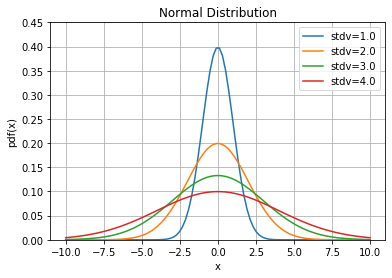

In [ ]:
ig, ax = plt.subplots()
x = np.linspace(-10,10,100)
stdvs = [1.0, 2.0, 3.0, 4.0]
for s in stdvs:
    ax.plot(x, norm.pdf(x,scale=s), label='stdv=%.1f' % s)

ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

No exemplo acima, note que

- aumentar o valor de $\sigma$ tem o efeito de *achatar* a curva. Isso faz sentido pois, em todos os casos, a área abaixo da curva deve permanecer igual a 1.

- mudar o valor de $\mu$ tem o efeito de transladar a curva para a esquerda ou para a direita, mantendo sua forma.

O próximo exemplo gera gráficos para outras variáveis aleatórias normais, dessa vez com mesma variância e médias diferentes.

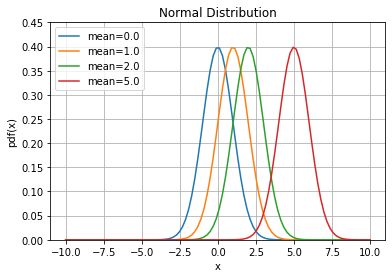

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
means = [0.0, 1.0, 2.0, 5.0]
for mean in means:
    ax.plot(x, norm.pdf(x,loc=mean), label='mean=%.1f' % mean)

ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

Outra função que iremos usar bastante é para gerar valores aleatórios de uma variável que segue a distribuição normal. Isso pode feito por meio da função `norm.rvs`.

In [ ]:
norm.rvs(scale=5, loc=10, size=3)

array([19.95537967,  6.81104017, 12.50724661])

O exemplo a seguir gera vários valores de uma variável aleatória normal e apresenta esses valores graficamente na forma de um histograma (a função de densidade também é apresentada no mesmo gráfico).

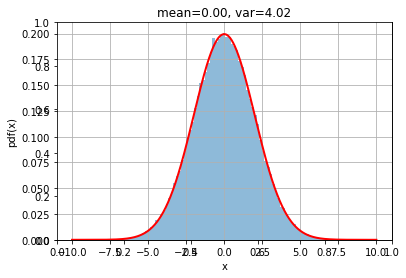

In [ ]:
fig, ax = plt.subplots()
xs = norm.rvs(scale=2,loc=0,size=100000)
x = np.linspace(-10,10,10000)
p = norm.pdf(x, scale=2)
v = np.var(xs)
m = np.mean(xs)
ax = fig.add_subplot(111)
ax.hist(xs, bins=100, alpha=0.5, density=True)
ax.plot(x, p, 'r-', lw=2)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title(f'mean={m:.2f}, var={v:.2f}')
ax.grid(True)

## Função de distribuição acumulada (*cumulative distribution function*)

A função de distribuição acumulada $F(X)$ de uma v.a. normal não possui uma forma fechada. De todo modo, podemos usar a função noarm.cdf para computar essa função. Veja o exemplo a seguir.

CDF = cumulative distribution function

In [ ]:
norm.cdf(2.4, scale=2)

0.8849303297782918

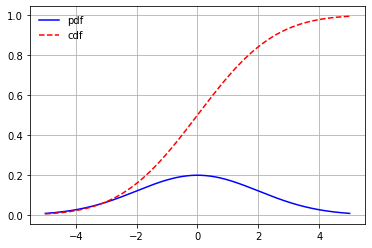

In [ ]:
x = np.linspace(-5, 5, 10000)

# vectorization
cdf_values = norm.cdf(x, scale=2)
pdf_values = norm.pdf(x, scale=2)

#plt.plot(x, pdf_values, x, cdf_values)

plt.plot(x, pdf_values, '-b', label='pdf')
plt.plot(x, cdf_values, '--r', label='cdf')

plt.grid(True)

plt.legend(loc='upper left', frameon=False)

plt.show()

## Distribuição normal padrão (*standard normal distribution*)

Damos o nome de **distribuição normal padrão** (*standard normal distribution*) à distribuição normal com média $\mu = 0$ e desvio-padrão $\sigma = 1$.

As funções de densidade e de distribuição acumulada para este caso são identificadas pelo uso das letras gregas $\phi$ e $\Phi$, respectivamente, no lugar dos usuais $f$ e $F$.

Escrevemos $X \sim N(\mu, \sigma^2)$ para denotar que uma variável aleatória $X$ segue distribuição normal de média $\mu$ e variância $\sigma^2$.

Em particular, se uma variável aleatória $Z$ tem distribuição normal padrão, então usamos $Z \sim N(0, 1)$.

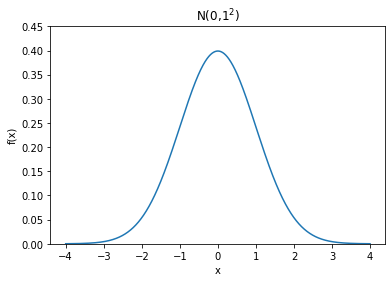

In [ ]:
fig, ax = plt.subplots()
x= np.arange(-4,4,0.001)
ax.set_title('N(0,$1^2$)')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.plot(x, norm.pdf(x))
ax.set_ylim(0,0.45)
plt.show()

## Regra empírica (*empirical rule*)

Os valores apresentados a seguir representam as probabilidades de se encontrar um valor de uma variável aleatória normal $X$ na faixa respectiva.
* 0,6827 ou 68,27\% para a faixa $\mu \pm 1 \times \sigma$
* 0,9545 ou 95,45\% para a faixa $\mu \pm 2 \times \sigma$
* 0,9973 ou 99,73\% para a faixa $\mu \pm 3 \times \sigma$

Se $X \sim N(\mu, \sigma^{2})$, a faixa $\mu \pm 3 \times \sigma$, ocorre a quase totalidade (99,73\%) dos valores. Por esse motivo, o valor $6\sigma$ é denominado *largura da distribuição normal*.

![alt text](https://upload.wikimedia.org/wikipedia/commons/a/a9/Empirical_Rule.PNG)

As probabilidades associadas a distribuições gaussianas são obtidas de 2 maneiras alternativas:

 * Se as probabilidades são necessárias como parte de um programa de computador, a integral de	$f(x)$ pode ser resolvida por algoritmos de cálculo numérico.
 * Se apenas algumas probabilidades são necessárias, então podemos fazer uso de **tabelas** para calculá-las. Essas tabelas são encontradas na maioria dos livros de estatística, e apresentam valores para $F(x) = \Pr(X < x)$.

* De acordo com as propriedades gerais aplicáveis a uma função de densidade qualquer,
 1. a área total sob a curva é igual a $1$ porque indica a probabilidade de todo o espaço amostral.
 2. a área sob a curva entre dois valores quaisquer de $X$ indica a probabilidade de seu valor estar entre esses valores.

*	A análise da curva normal nos permite concluir que as ocorrências de $X$ tendem a se concentrar em torno de $\mu$ e se tornam mais raras (i.e., menos prováveis) na medida em que dela se afastam.

Por meio de [integração numérica](https://en.wikipedia.org/wiki/Numerical_integration) da função de densidade normal, é possível calcular a probabilidade de ocorrência em função do afastamento da média segundo o número de desvios-padrão.

## Exercícios

E01 (Montgomery, pp. 112): Seja $Z \sim N(0, 1)$. Calcule

1.	$\Pr(Z < -0,86)$
2.	$\Pr(Z > 1,26)$
3.	$\Pr(Z > -1,37)$
4.	$\Pr(-1,25<Z<0,37)$
5.	$\Pr(Z<-4,6)$

$$
f(x) \rightarrow \text{norm.pdf}
$$

$$
F(x) = \Pr(X \leq x) \rightarrow \text{norm.cdf}
$$



In [ ]:
#E01.1
#cdf --> cumulative distribution function
from scipy.stats import norm
x = -.86
cdf_value = norm.cdf(x)
print(cdf_value)

0.1948945212518084


$$
\Pr(Z> 1.26) = 1 - \Pr(Z \leq 1.26)
$$

In [ ]:
# E01.2
# Pr(𝑍 > 1,26)
from scipy.stats import norm
x = 1.26
cdf_value = 1 - norm.cdf(x)
print(cdf_value)

0.10383468112130045


In [ ]:
# E01.3
# Pr(𝑍 > −1,37)
from scipy.stats import norm
x = -1.37
cdf_value = 1 - norm.cdf(x)
print(cdf_value)
print(norm.cdf(x)+cdf_value)

0.914656549178033
1.0


$$
Pr(−1.25<𝑍<0.37) = \Pr(Z<0.37) - \Pr(Z<-1.25)
$$

In [ ]:
# Pr(−1,25<𝑍<0,37)
from scipy.stats import norm

cdf_value1 = norm.cdf(-1.25)
cdf_value2 = norm.cdf(.37)

print(cdf_value2 - cdf_value1)

0.5386589811336914


In [ ]:
# Pr(𝑍<−4,6)
from scipy.stats import norm
cdf_value1 = norm.cdf(-4.6)
print(cdf_value1)

2.1124547025028537e-06


Resposta (E01):

1.	$\Pr(Z < -0,86) = 0,1949$.
2.	$\Pr(Z > 1,26) = 1 - \Pr(Z \leq 1,26) = 1 - 0,8962 = 0,1038$.
3.	$\Pr(Z > -1,37) = \Pr(Z < 1,37) = 0,9147$.
4.	$\Pr(-1,25 < Z < 0,37) = \Pr(Z < 0.37) - \Pr(Z < -1.25) = 0,6443 - 0,1056 = 0,5387$.


E02: Seja $Z \sim N(0, 1)$. Encontre o valor $z$ tal que $\Pr(Z>z) = 0,05$.


Resposta (E02):
Esse problema pode ser reformulado para determinar o valor z tal que $\Pr(Z \leq z) = 0,95$. Agora a tabela de probabilidades é usada ao contrário: procuramos até encontrar o valor que corresponde a $0,95$. Resposta: $z = 1,65$.

E03: Seja $Z \sim N(0, 1)$. Encontre o valor z tal que $\Pr(-z < Z < z) = 0,99$.

Resposta (E03): Por conta da simetria da distribuição normal, se a área da região sombreada na figura for igual a $0,99$, então área total de cada região não sombreada é igual a $(1-0,99)/2=0,005$. Logo o valor de $z$ corresponde a uma probabilidade de 0,995 na tabela. A probabilidade mais próxima é $0,99506$, quando $z = 2,58$.

E04
Seja X ~ N(5, 2)
Calcule Pr(X > 0)

In [ ]:
from scipy.stats import norm
cdf_value1 = 1 - norm.cdf(0, scale=2, loc=5)
print(cdf_value1)

0.9937903346742238


In [ ]:
z = (0 - 5)/2
print(z)
cdf_value1 = 1 - norm.cdf(-2.5)
print(cdf_value1)

-2.5
0.9937903346742238


## Padronização

Seja $X$ uma v.a. com distribuição normal genérica, $X \sim N(\mu, \sigma^2)$. Então
	\begin{equation}
	Z = \frac{X - \mu}{\sigma} \nonumber
	\end{equation}

é também um variável aleatória e possui distribuição normal padrão, isto é, $Z \sim N(0, 1)$.
  
Isso significa que, a partir de valores tabelados da distribuição normal padrão, é possível o cálculo de probabilidades para quaisquer valores dos parâmetros $\mu$ e $\sigma^2$ (i.e., para qualquer outra v.a. normal).

Esta padronização é conveniente, já que permite o cálculo da função de densidade e da função acumulada de uma distribuição normal qualquer, uma vez que temos acesso aos valores da função de densidade e da função acumulada da distribuição normal padrão. Essas funções são relacionadas da seguinte forma

\begin{equation}
    F_X(x) = \Phi\bigg(\frac{x-\mu}{\sigma}\bigg), \quad f_X(x) = \frac{1}{\sigma}\,\phi\bigg(\frac{x-\mu}{\sigma}\bigg).
\end{equation}

## Exercícios

E04: as alturas dos alunos de determinada escola são normalmente distribuídas com média 1,6m e desvio padrão 0,30m.

1. Encontre a probabilidade de um aluno medir:
	  * entre 1,50m e 1,80m
	  * mais de 1,75m
	  * menos de 1,48m

2. Qual deve ser a altura mínima para 10\% dos mais altos?

In [ ]:
norm.cdf(1.8, loc = 1.6, scale = 0.3) - norm.cdf(1.5, loc = 1.6, scale = 0.3)

0.3780661222713136

Resposta - exemplo 04: Primeiro, note que
	\begin{equation}
		z_1 = \frac{x_1-\mu}{\sigma} = \frac{1,50-1,60}{0,3} = -0,33
	\end{equation}
e que
	\begin{equation}
		z_2 = \frac{x_2-\mu}{\sigma} = \frac{1,80-1,60}{0,3} = 0,67.
	\end{equation}
Então
	\begin{align}
		\Pr(x_1 < X < x_2) = \Pr(z_1 < Z < z_2) &= \nonumber \\
		\Pr(-0.33 < Z < 0.67) = \Pr(Z < 0.67) - \Pr(Z < -0,33) &=  \nonumber \\
		0,7486 - 0,3707 &= \nonumber \\
		0,3779 = 37,79\%. \nonumber
	\end{align}

In [ ]:
norm.cdf(0.67, loc = 0, scale = 1) - norm.cdf(-.33, loc = 0, scale = 1)

0.3778711238453435

In [ ]:
norm.ppf(.9, loc = 1.6, scale = .3)

1.98446546966338

## Funções relevantes no pacote [scipy.norms](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

Methods

* rvs(loc=0, scale=1, size=1, random_state=None) --> Random variates.

* pdf(x, loc=0, scale=1) --> Probability density function.

* logpdf(x, loc=0, scale=1) --> Log of the probability density function.

* cdf(x, loc=0, scale=1) --> Cumulative distribution function.

* logcdf(x, loc=0, scale=1) --> Log of the cumulative distribution function.

* sf(x, loc=0, scale=1)
 --> Survival function (also defined as 1 - cdf, but sf is sometimes more accurate).

* logsf(x, loc=0, scale=1) --> Log of the survival function.

* ppf(q, loc=0, scale=1) --> Percent point function (inverse of cdf — percentiles).

* isf(q, loc=0, scale=1) --> Inverse survival function (inverse of sf).

* moment(n, loc=0, scale=1) --> Non-central moment of order n

* stats(loc=0, scale=1, moments=’mv’) --> Mean(‘m’), variance(‘v’), skew(‘s’), and/or kurtosis(‘k’).

* entropy(loc=0, scale=1) --> (Differential) entropy of the RV.

* fit(data, loc=0, scale=1) --> Parameter estimates for generic data.

* expect(func, args=(), loc=0, scale=1, lb=None, ub=None, conditional=False, **kwds) --> Expected value of a function (of one argument) with respect to the distribution.

* median(loc=0, scale=1) --> Median of the distribution.

* mean(loc=0, scale=1) --> Mean of the distribution.

* var(loc=0, scale=1) --> Variance of the distribution.

* std(loc=0, scale=1) --> Standard deviation of the distribution.

* interval(alpha, loc=0, scale=1) --> Endpoints of the range that contains alpha percent of the distribution

In [ ]:
from scipy.stats import norm
norm.cdf(1) - norm.cdf(-1)

0.6826894921370859